In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("train.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [4]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.shape

(29020, 19)

In [6]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df["no_of_adults"].value_counts()

no_of_adults
2    20896
1     6154
3     1841
0      116
4       13
Name: count, dtype: int64

In [9]:
df["type_of_meal_plan"].value_counts()

type_of_meal_plan
Meal Plan 1     22274
Not Selected     4085
Meal Plan 2      2657
Meal Plan 3         4
Name: count, dtype: int64

In [10]:
cat_cols = [
    "type_of_meal_plan",
    "required_car_parking_space",
    "room_type_reserved",
    "market_segment_type",
    "repeated_guest",
    "booking_status",
]

num_cols = df.columns.difference(cat_cols + ["Booking_ID"])

In [11]:
num_cols

Index(['arrival_date', 'arrival_month', 'arrival_year', 'avg_price_per_room',
       'lead_time', 'no_of_adults', 'no_of_children',
       'no_of_previous_bookings_not_canceled', 'no_of_previous_cancellations',
       'no_of_special_requests', 'no_of_week_nights', 'no_of_weekend_nights'],
      dtype='object')

### Data Analysis

In [25]:
data = df.copy()

In [ ]:
# Unique Value Analysis
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features) * 5))
    if len(num_features) == 1:
        axes = [axes]

    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
        axes[i][1].set_title(f"Boxplot for {column}")

    plt.tight_layout()
    plt.show()

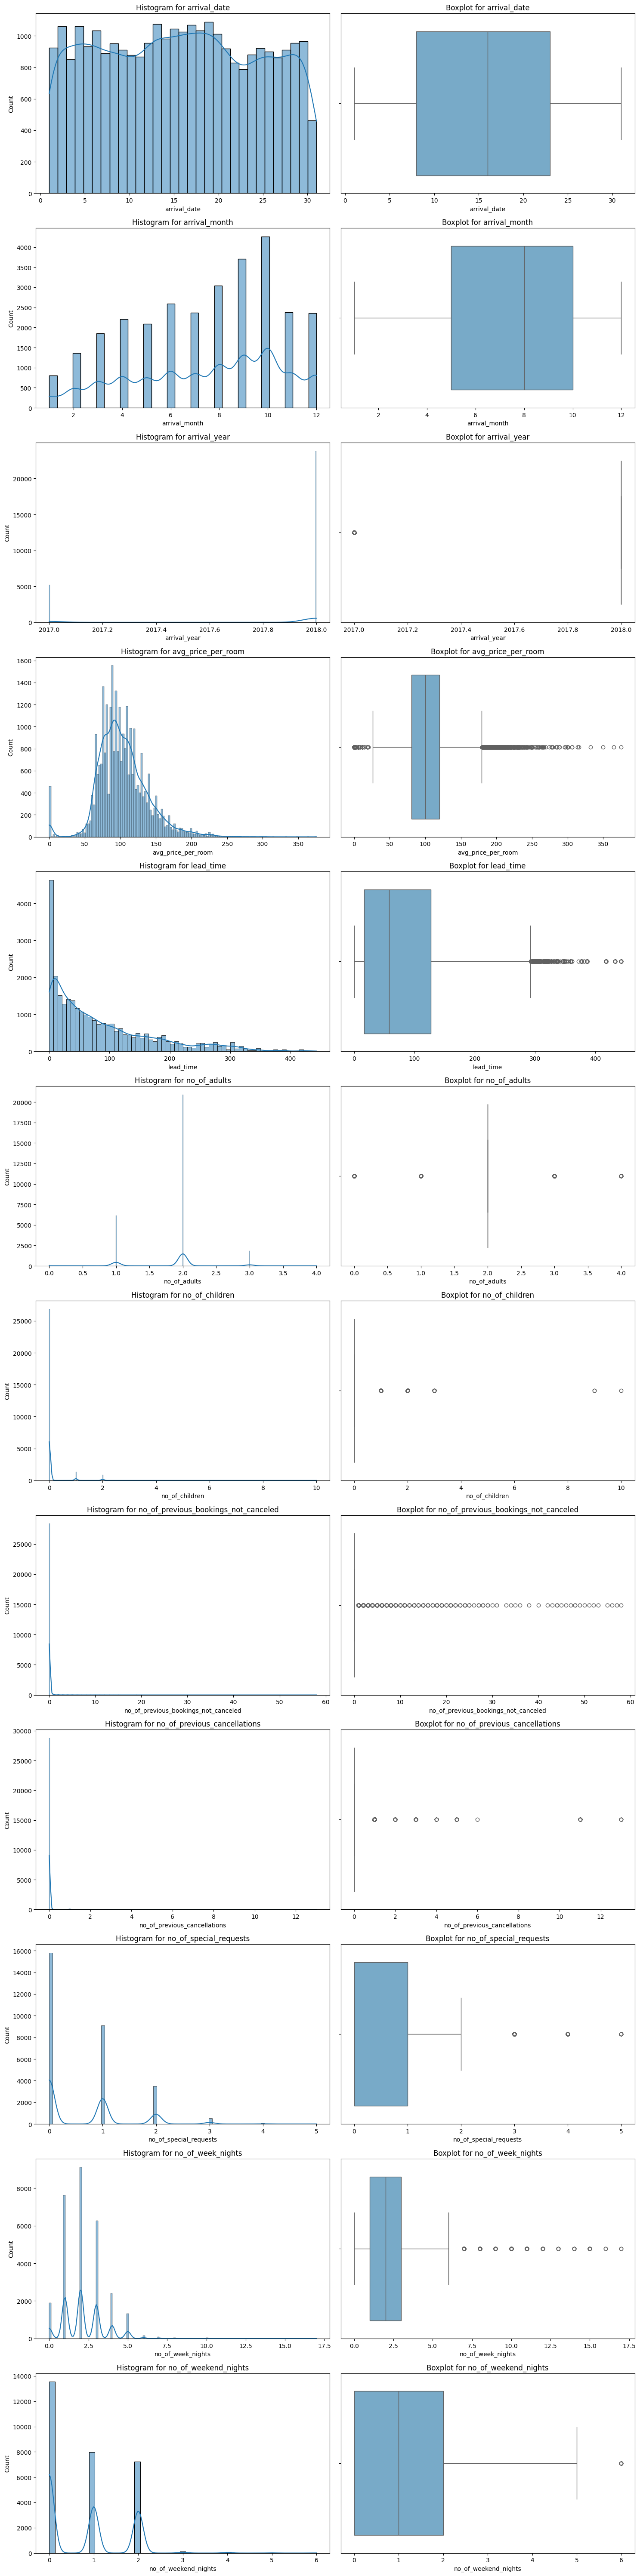

In [27]:
num_plot_dist(data, num_cols)

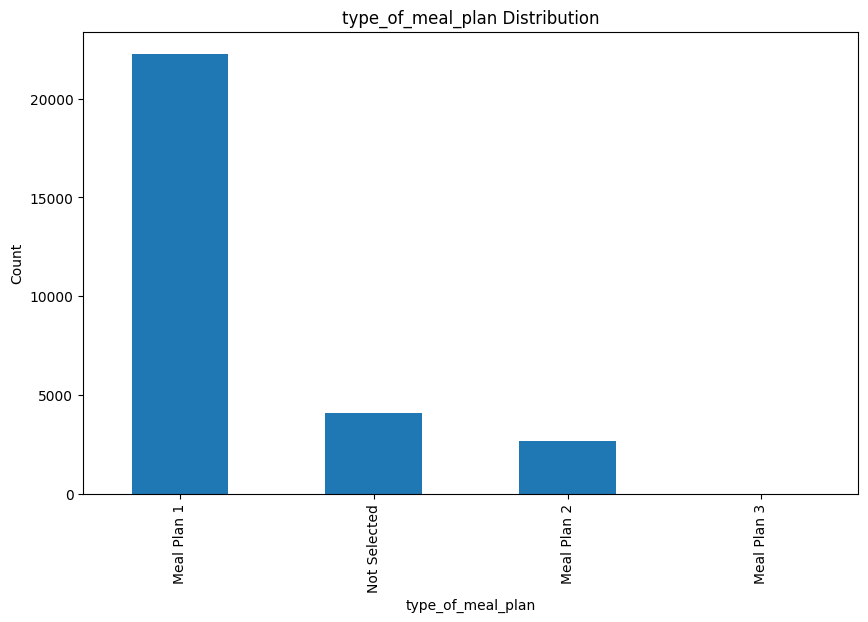

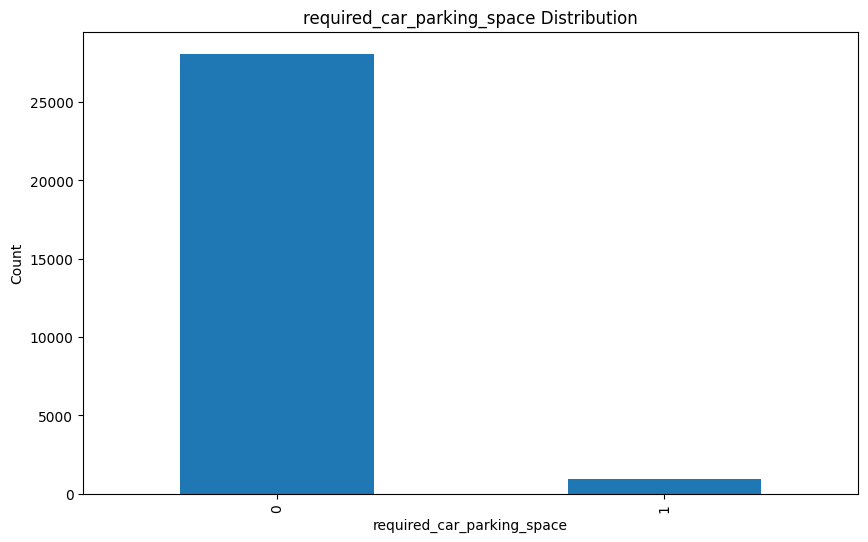

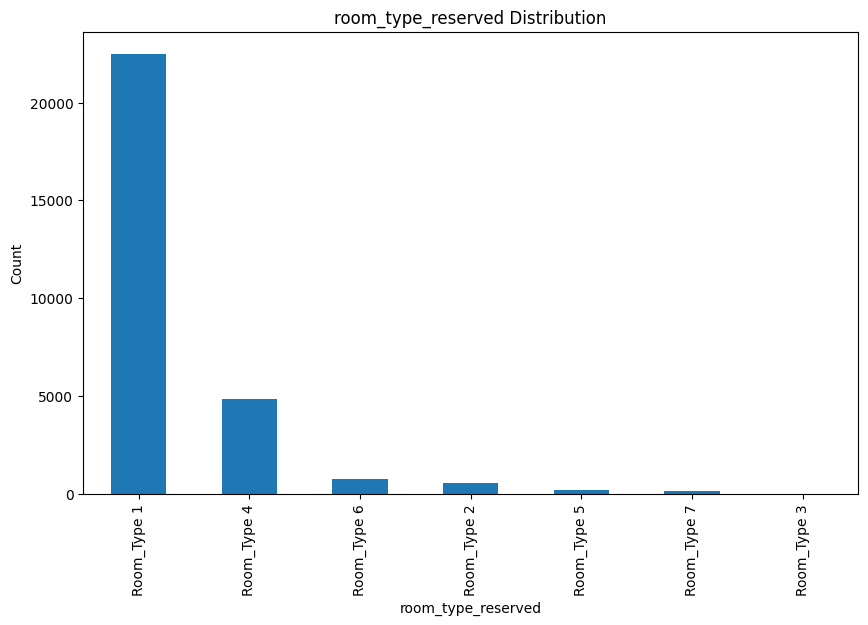

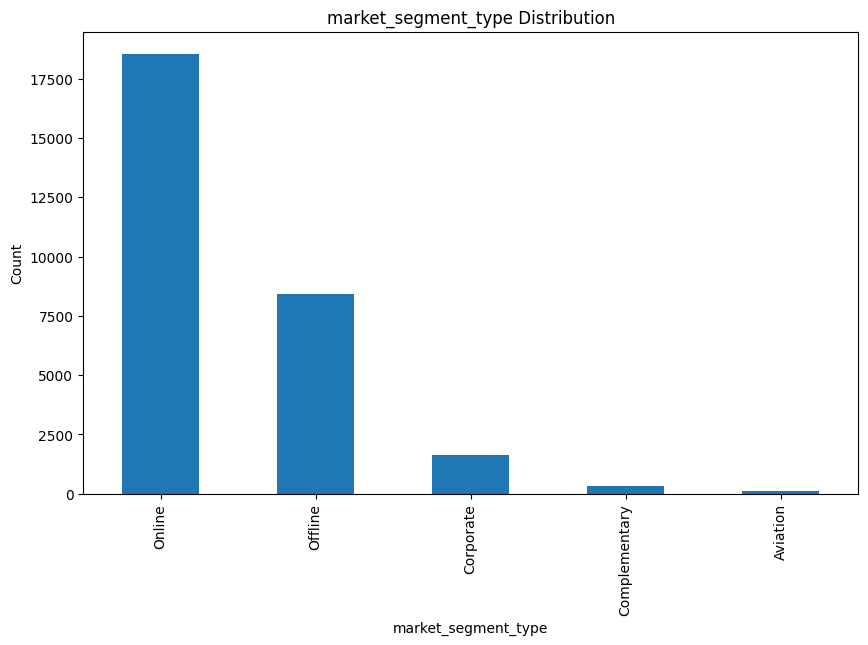

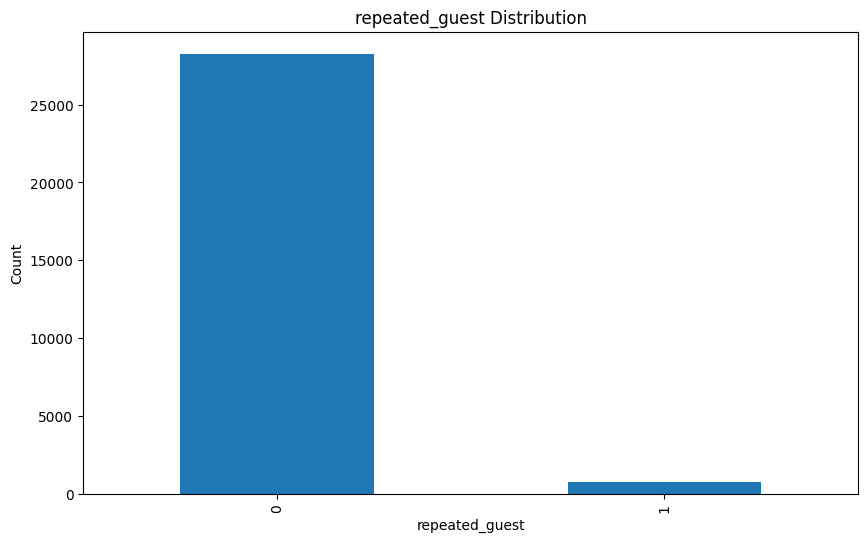

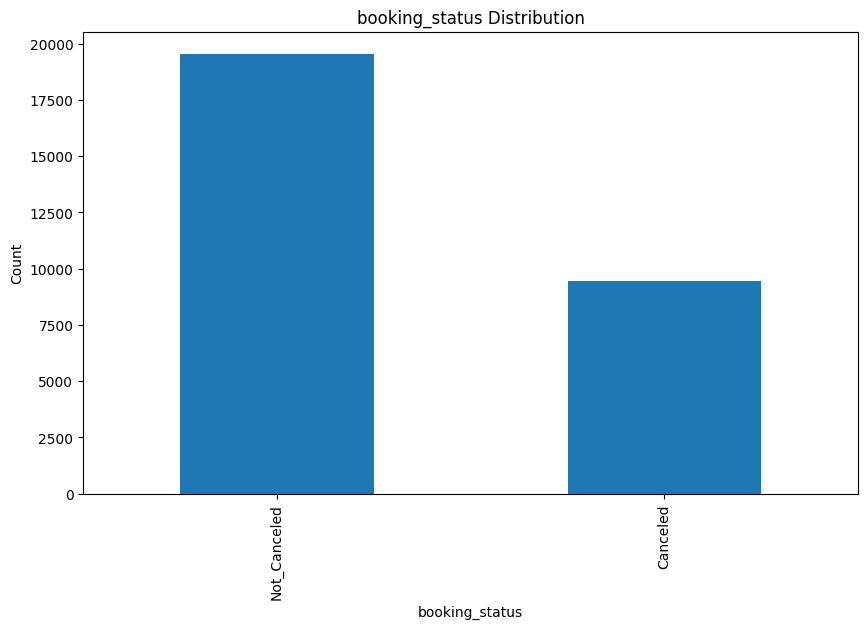

In [30]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10, 6))
    data[cat_feature].value_counts().plot(kind="bar")
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

### Bivariate Analysis

In [ ]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(num_features):
        sns.boxplot(x=target, y=col, ax=axes[i], data=df, palette="Blues")
        axes[i].set_title(f"{col} VS {target}")

    plt.tight_layout()
    plt.show()

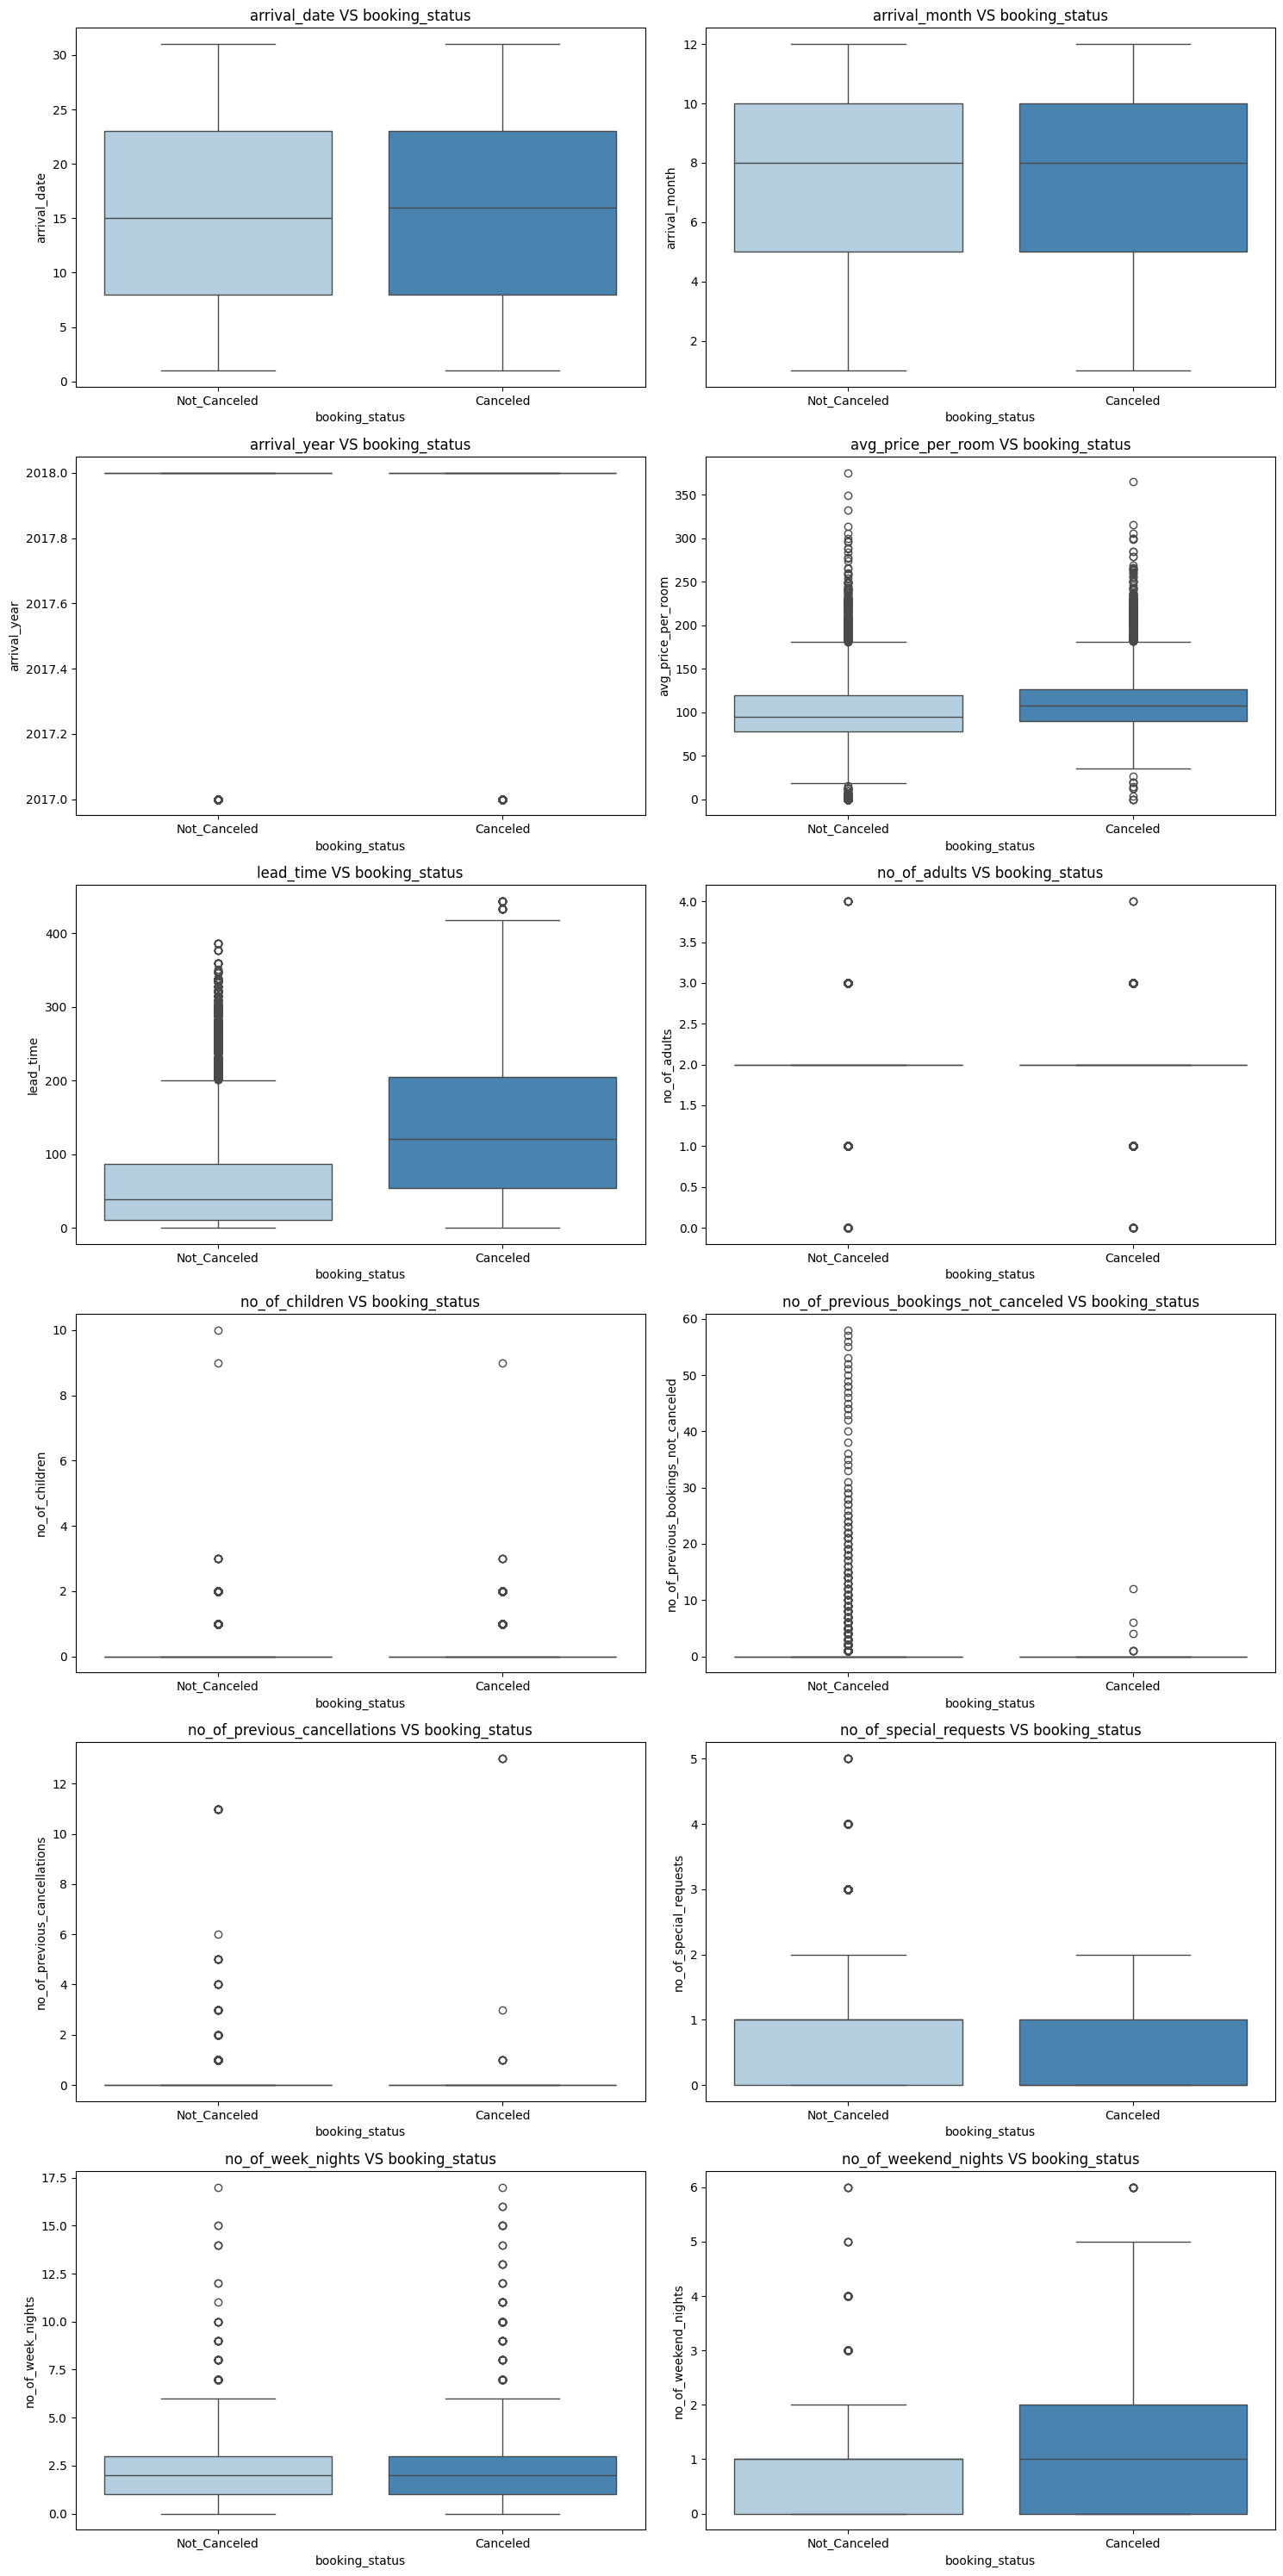

In [34]:
plot_bivariate_num(data, "booking_status", num_cols)

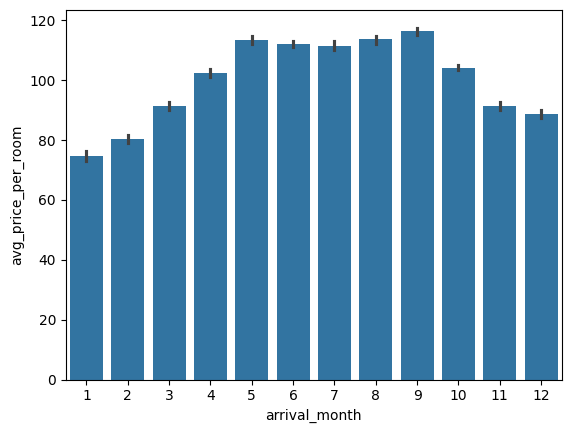

In [35]:
sns.barplot(x="arrival_month", y="avg_price_per_room", data=data)
plt.show()

In [ ]:
def plot_bivariate_cat(df, target, cat_features):
    num_plots = len(cat_features)
    num_rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(cat_features):
        sns.countplot(x=col, hue=target, ax=axes[i], data=df, palette="Blues")
        axes[i].set_title(f"{col} VS {target}")
        axes[i].tick_params(axis="x", rotation=90)

    plt.tight_layout()
    plt.show()

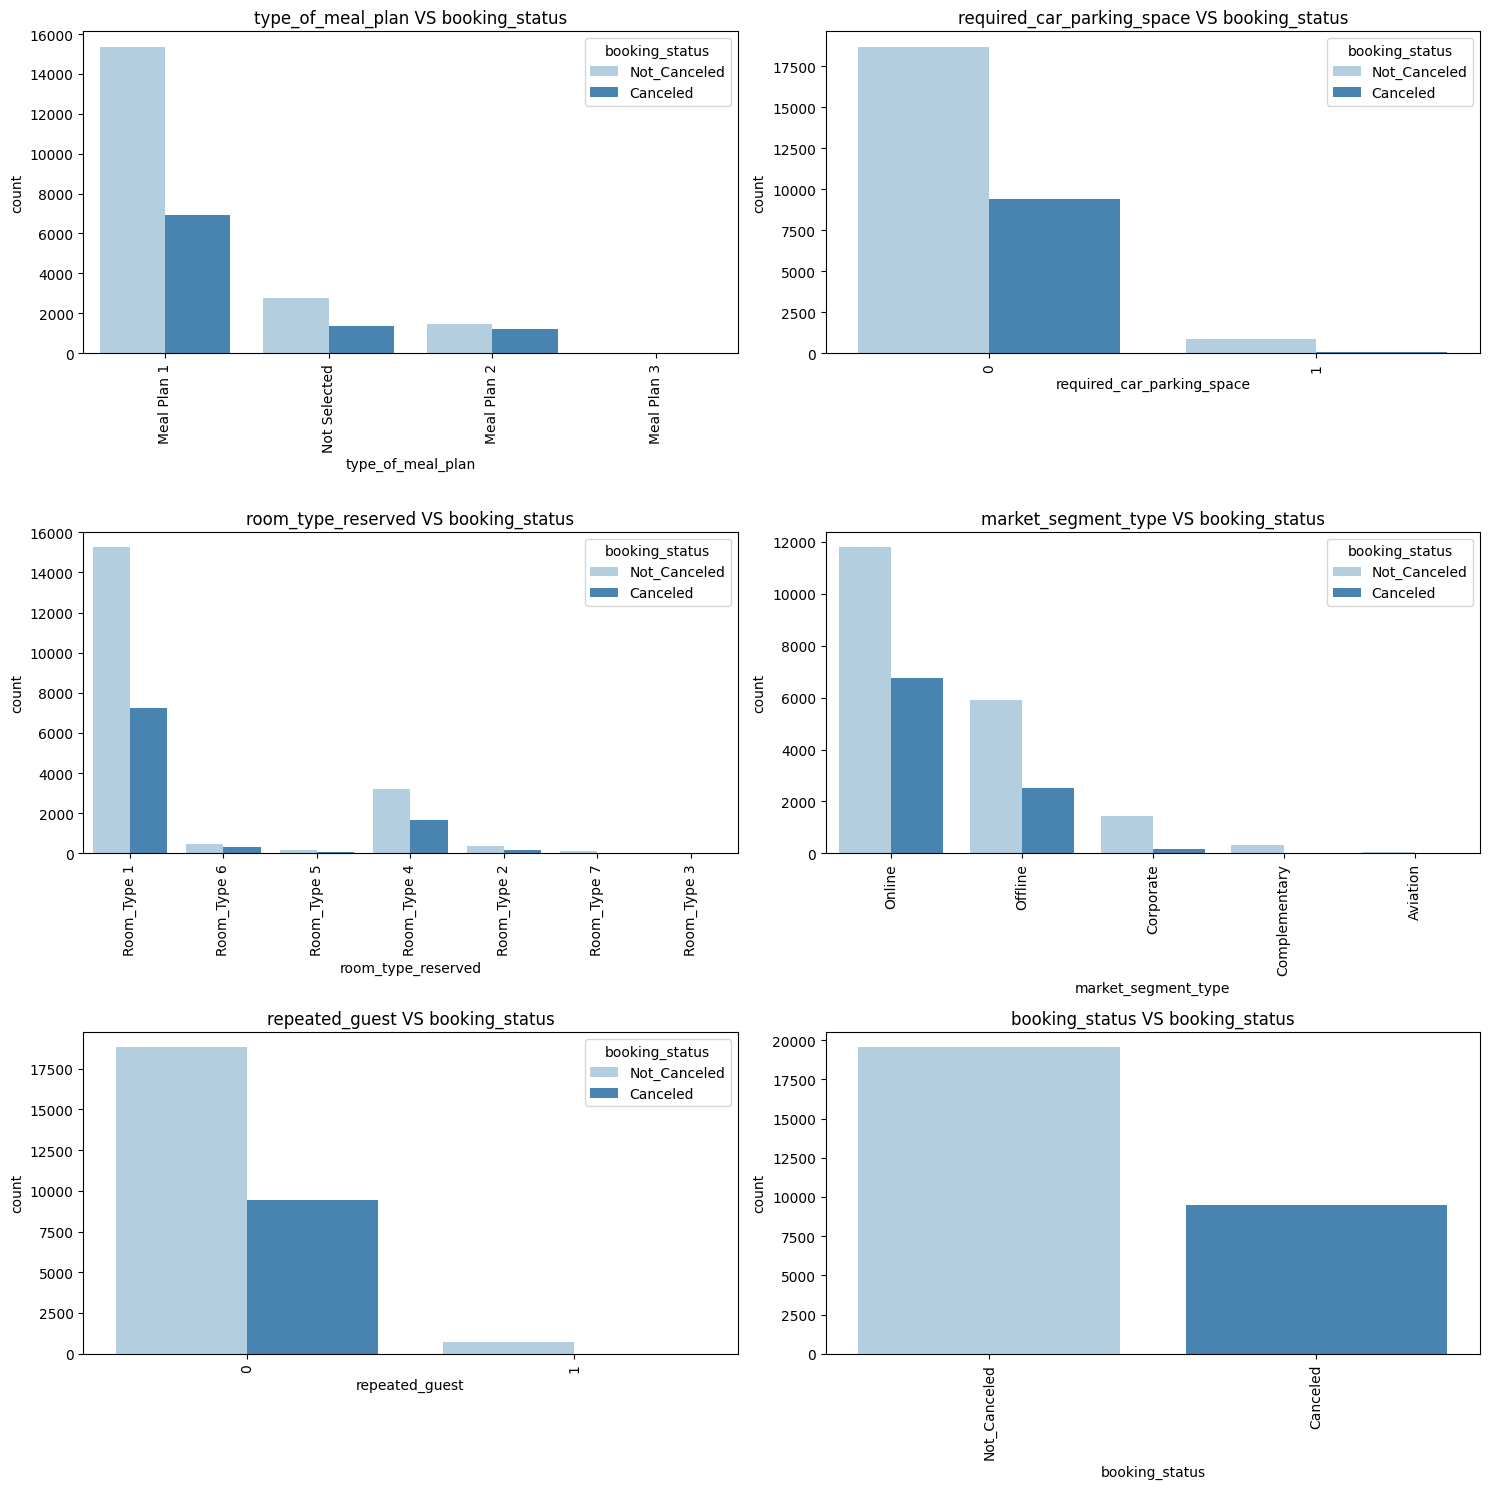

In [39]:
plot_bivariate_cat(data, "booking_status", cat_cols)

### Data Processing

In [41]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

mappings = {}

for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])
    mappings[col] = {
        label: code
        for label, code in zip(encoder.classes_, encoder.transform(encoder.classes_))
    }

In [ ]:
# Multicollinearity

In [44]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 10.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 1.9 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [47]:
df.drop(columns=["Booking_ID"], inplace=True)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [49]:
vif_data

,feature,VIF
0,const,3.585767e+07
1,no_of_adults,1.295419e+00
2,no_of_children,1.257749e+00
3,no_of_weekend_nights,1.062324e+00
4,no_of_week_nights,1.086849e+00
5,type_of_meal_plan,1.155976e+00
6,required_car_parking_space,1.036866e+00
7,room_type_reserved,1.530014e+00
8,lead_time,1.440424e+00
9,arrival_year,1.297431e+00


<Axes: >

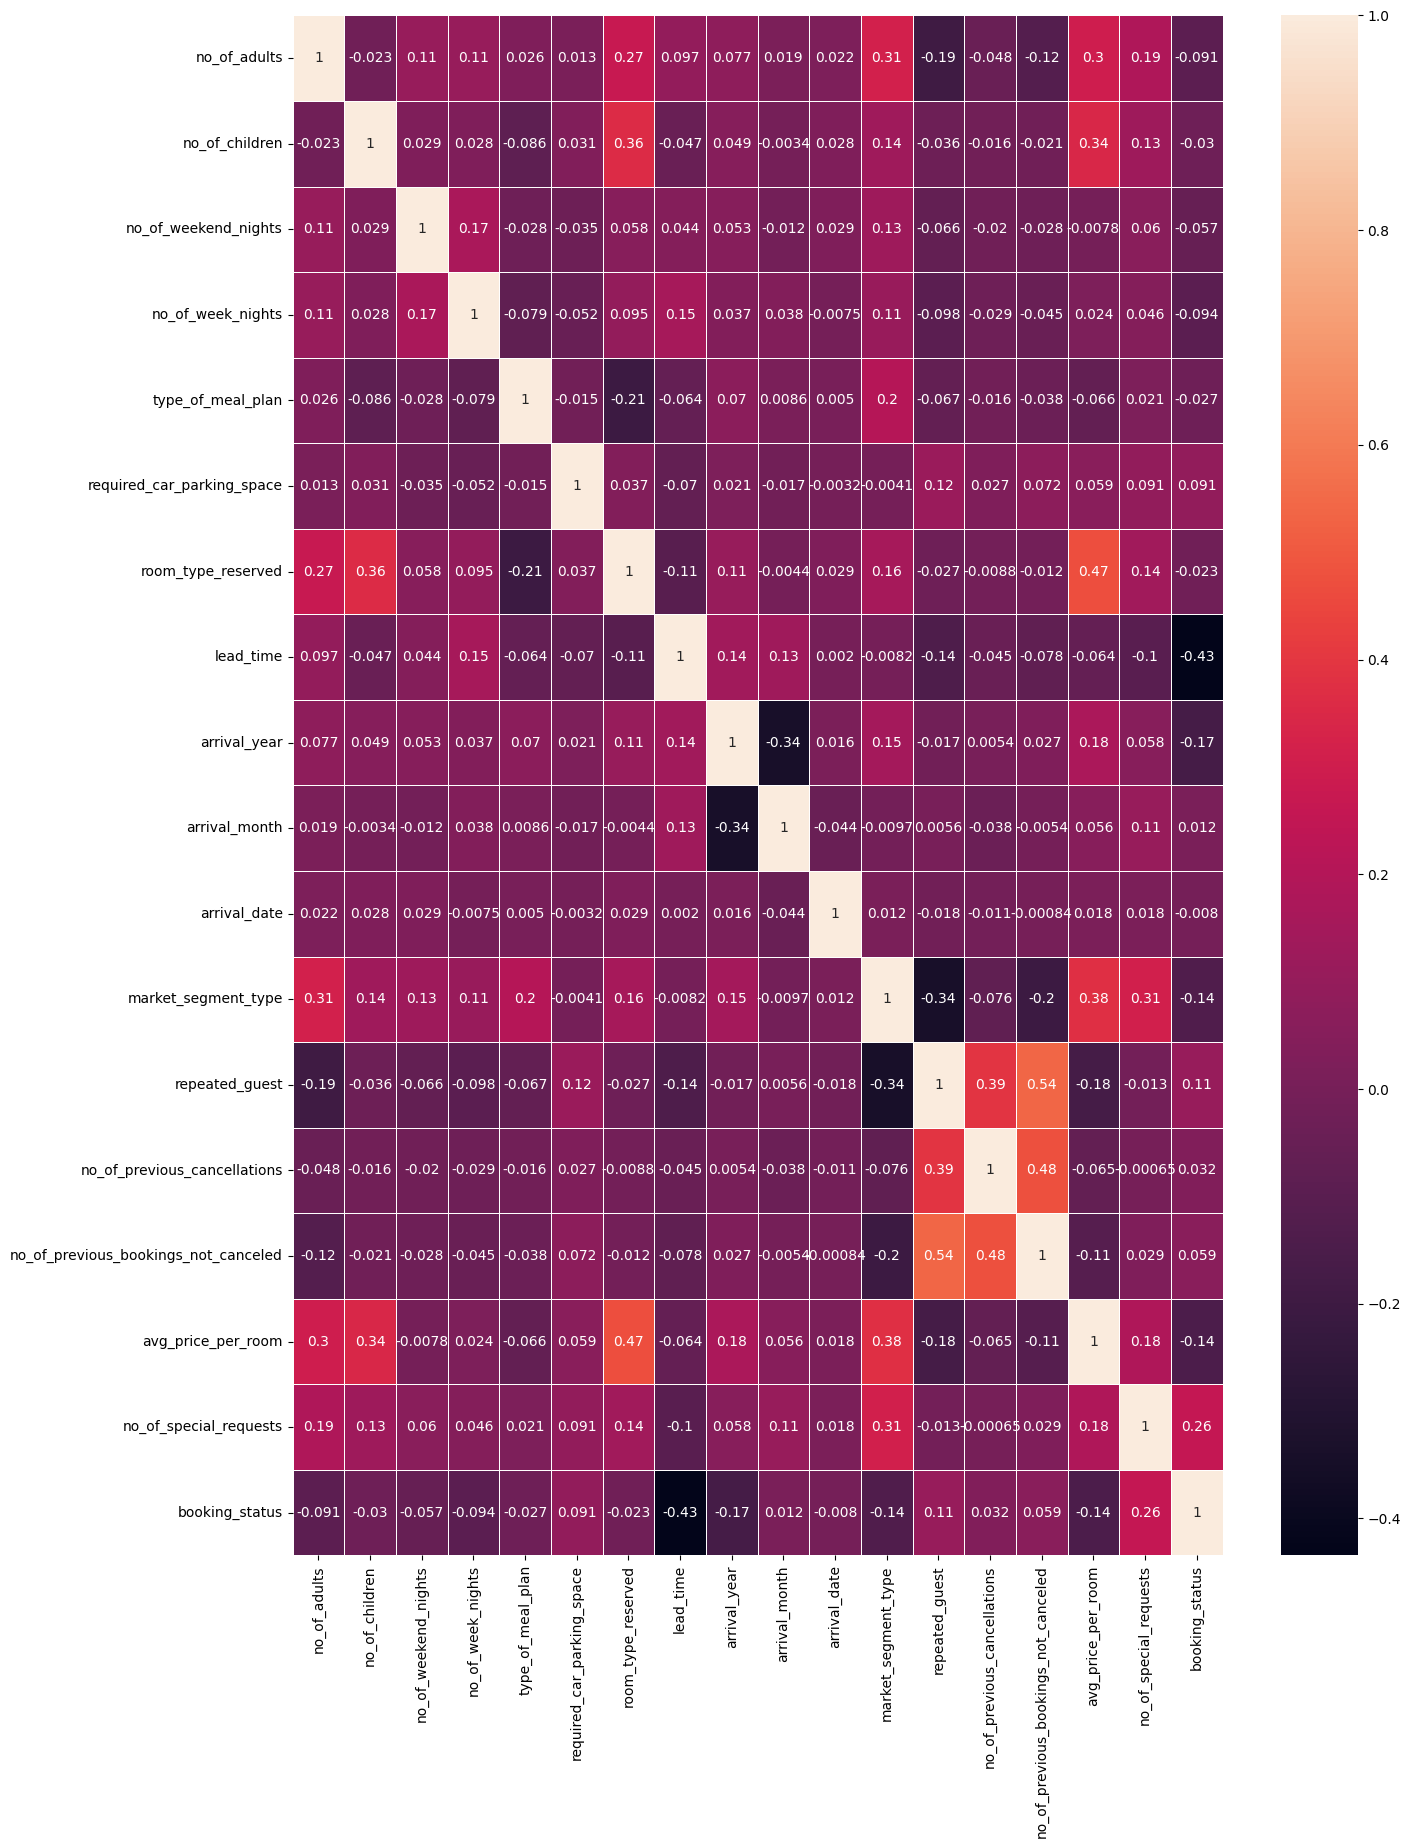

In [52]:
plt.figure(figsize=(15, 20))
sns.heatmap(df.corr(), annot=True, linewidths=0.5)

In [53]:
# Skewness

In [55]:
for col in df.columns:
    if df.skew()[col] > 5:
        df[col] = np.log1p(df[col])

In [56]:
df.skew()

no_of_adults                            -0.340838
no_of_children                           4.844412
no_of_weekend_nights                     0.719426
no_of_week_nights                        1.542808
type_of_meal_plan                        1.806612
required_car_parking_space               5.323647
room_type_reserved                       1.729866
lead_time                                1.289144
arrival_year                            -1.669774
arrival_month                           -0.346711
arrival_date                             0.027335
market_segment_type                     -1.670290
repeated_guest                           5.985562
no_of_previous_cancellations            14.550045
no_of_previous_bookings_not_canceled     8.897196
avg_price_per_room                       0.623772
no_of_special_requests                   1.150448
booking_status                          -0.741025
dtype: float64

In [57]:
# Imbalanced Data

In [58]:
df["booking_status"].value_counts()

booking_status
1    19551
0     9469
Name: count, dtype: int64

In [59]:
X = df.drop(columns=["booking_status"])
y = df["booking_status"]

In [61]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 1.6 MB/s eta 0:00:0000:0100:01m

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X, y)

In [65]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df["booking_status"] = y_res

In [68]:
# Feature Selection

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
model = RandomForestClassifier(random_state=42)
model.fit(X_res, y_res)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [72]:
feature_importance = model.feature_importances_

In [ ]:
feature_importance_df = pd.DataFrame(
    {"feature": X.columns, "importance": feature_importance}
)

In [ ]:
top_features_importance_df = feature_importance_df.sort_values(
    by="importance", ascending=False
)

In [82]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = balanced_df[top_10_features.tolist() + ["booking_status"]]

In [84]:
# Model Selection

In [85]:
!pip install xgboost lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 5.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 3.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 5.8 MB/s eta 0:00:0000:0100:02m

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [87]:
X = top_10_df.drop(columns=["booking_status"])
y = top_10_df["booking_status"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier(),
}

In [ ]:
metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []}

In [91]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

[20:00:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



[LightGBM] [Info] Number of positive: 15649, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 31281, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500272 -> initscore=0.001087
[LightGBM] [Info] Start training from score 0.001087


In [92]:
metrics_df = pd.DataFrame(metrics)

In [93]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.797596,0.806665,0.781650,0.793961
1,Support Vector Machine,0.695180,0.661078,0.798309,0.723241
2,Decision Tree,0.881857,0.884556,0.877755,0.881142
3,Random Forest,0.914205,0.910755,0.917991,0.914359
4,K-Nearest Neighbors,0.831991,0.857459,0.795489,0.825312
5,Naive Bayes,0.755274,0.775499,0.717068,0.745140
6,Gradient Boosting,0.840046,0.843127,0.834700,0.838892
7,AdaBoost,0.779440,0.758367,0.818811,0.787431
8,XGBoost,0.897583,0.893428,0.902358,0.897871
9,LightGBM,0.886204,0.878392,0.895951,0.887084


In [94]:
# Train RF Model

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [96]:
rf = RandomForestClassifier(random_state=42)

In [97]:
params_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": randint(10, 50),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5),
    "bootstrap": [True, False],
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring="accuracy",
)

In [99]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.5s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.5s
[CV]

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....x736350722f90>, 'min_samples_leaf': <scipy.stats....x73634438cd90>, 'min_samples_split': <scipy.stats....x73634438da50>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [100]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [101]:
best_rf_model = random_search.best_estimator_

In [102]:
y_pred = best_rf_model.predict(X_test)

In [103]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [104]:
accuracy

0.9127988748241913

In [105]:
precision

0.9069767441860465

In [106]:
import joblib

In [108]:
joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [110]:
loaded_model = joblib.load("random_forest.pkl")